# CW2: Hospital Readmission Prediction for Diabetic Patients


### Imports


In [49]:
# Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
# Using pip
%pip install seaborn --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


## Task 1: Dataset description


In [18]:
df = pd.read_csv("dataset_diabetes/diabetic_data.csv")
IDs_mapping = pd.read_csv("dataset_diabetes/IDs_mapping.csv")


In [19]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [20]:
IDs_mapping.head()


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [27]:
print(f"df has {df.shape[1]} features and {df.shape[0]} samples")
print(f"The features are {df.columns}")


df has 50 features and 101766 samples
The features are Index(['ENCOUNTER_ID', 'PATIENT_NBR', 'RACE', 'GENDER', 'AGE', 'WEIGHT',
       'ADMISSION_TYPE_ID', 'DISCHARGE_DISPOSITION_ID', 'ADMISSION_SOURCE_ID',
       'TIME_IN_HOSPITAL', 'PAYER_CODE', 'MEDICAL_SPECIALTY',
       'NUM_LAB_PROCEDURES', 'NUM_PROCEDURES', 'NUM_MEDICATIONS',
       'NUMBER_OUTPATIENT', 'NUMBER_EMERGENCY', 'NUMBER_INPATIENT', 'DIAG_1',
       'DIAG_2', 'DIAG_3', 'NUMBER_DIAGNOSES', 'MAX_GLU_SERUM', 'A1CRESULT',
       'METFORMIN', 'REPAGLINIDE', 'NATEGLINIDE', 'CHLORPROPAMIDE',
       'GLIMEPIRIDE', 'ACETOHEXAMIDE', 'GLIPIZIDE', 'GLYBURIDE', 'TOLBUTAMIDE',
       'PIOGLITAZONE', 'ROSIGLITAZONE', 'ACARBOSE', 'MIGLITOL', 'TROGLITAZONE',
       'TOLAZAMIDE', 'EXAMIDE', 'CITOGLIPTON', 'INSULIN',
       'GLYBURIDE-METFORMIN', 'GLIPIZIDE-METFORMIN',
       'GLIMEPIRIDE-PIOGLITAZONE', 'METFORMIN-ROSIGLITAZONE',
       'METFORMIN-PIOGLITAZONE', 'CHANGE', 'DIABETESMED', 'READMITTED'],
      dtype='object')


In [22]:
df.describe()


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [23]:
df.isnull().sum()


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [36]:
df.info()  # objecttype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ENCOUNTER_ID              101766 non-null  int64 
 1   PATIENT_NBR               101766 non-null  int64 
 2   RACE                      101766 non-null  object
 3   GENDER                    101766 non-null  object
 4   AGE                       101766 non-null  object
 5   WEIGHT                    101766 non-null  object
 6   ADMISSION_TYPE_ID         101766 non-null  int64 
 7   DISCHARGE_DISPOSITION_ID  101766 non-null  int64 
 8   ADMISSION_SOURCE_ID       101766 non-null  int64 
 9   TIME_IN_HOSPITAL          101766 non-null  int64 
 10  PAYER_CODE                101766 non-null  object
 11  MEDICAL_SPECIALTY         101766 non-null  object
 12  NUM_LAB_PROCEDURES        101766 non-null  int64 
 13  NUM_PROCEDURES            101766 non-null  int64 
 14  NUM_

In [38]:
# auxiliary functions
def check_df(dataframe):
    print("##################### Info #####################\n")
    print(dataframe.info())
    print("##################### Shape #####################\n")
    print(dataframe.shape)
    print("##################### Types #####################\n")
    print(dataframe.dtypes)
    print("##################### Head #####################\n")
    print(dataframe.head(3))
    print("##################### Tail #####################\n")
    print(dataframe.tail(3))
    print("##################### NA ##################### \n")
    print(dataframe.isnull().sum())


check_df(df)


##################### Info #####################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ENCOUNTER_ID              101766 non-null  int64 
 1   PATIENT_NBR               101766 non-null  int64 
 2   RACE                      101766 non-null  object
 3   GENDER                    101766 non-null  object
 4   AGE                       101766 non-null  object
 5   WEIGHT                    101766 non-null  object
 6   ADMISSION_TYPE_ID         101766 non-null  int64 
 7   DISCHARGE_DISPOSITION_ID  101766 non-null  int64 
 8   ADMISSION_SOURCE_ID       101766 non-null  int64 
 9   TIME_IN_HOSPITAL          101766 non-null  int64 
 10  PAYER_CODE                101766 non-null  object
 11  MEDICAL_SPECIALTY         101766 non-null  object
 12  NUM_LAB_PROCEDURES        101766 non-null  int64 
 13  NUM_PROCE

In [39]:
# Unique values per feature
for i in list(df.columns):
    print(
        "Number of Unique values in {} :  {} ".format(i, df[i].value_counts().shape[0])
    )


Number of Unique values in ENCOUNTER_ID :  101766 
Number of Unique values in PATIENT_NBR :  71518 
Number of Unique values in RACE :  6 
Number of Unique values in GENDER :  3 
Number of Unique values in AGE :  10 
Number of Unique values in WEIGHT :  10 
Number of Unique values in ADMISSION_TYPE_ID :  8 
Number of Unique values in DISCHARGE_DISPOSITION_ID :  26 
Number of Unique values in ADMISSION_SOURCE_ID :  17 
Number of Unique values in TIME_IN_HOSPITAL :  14 
Number of Unique values in PAYER_CODE :  18 
Number of Unique values in MEDICAL_SPECIALTY :  73 
Number of Unique values in NUM_LAB_PROCEDURES :  118 
Number of Unique values in NUM_PROCEDURES :  7 
Number of Unique values in NUM_MEDICATIONS :  75 
Number of Unique values in NUMBER_OUTPATIENT :  39 
Number of Unique values in NUMBER_EMERGENCY :  33 
Number of Unique values in NUMBER_INPATIENT :  21 
Number of Unique values in DIAG_1 :  717 
Number of Unique values in DIAG_2 :  749 
Number of Unique values in DIAG_3 :  790 

In [29]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    ------
        dataframe: dataframe

        cat_th: int, optional

        car_th: int, optinal
    Returns
    ------
        cat_cols: list
                Categorical features
        num_cols: list
                Numerical features
        cat_but_car: list
               Categorical view cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"
    ]
    cat_but_car = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"
    ]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 101766
Variables: 50
cat_cols: 35
num_cols: 11
cat_but_car: 4
num_but_cat: 2


### Target encoding


In [44]:
unique_values = df["READMITTED"].unique()
print(unique_values)
value_counts = df["READMITTED"].value_counts()
print(value_counts)


['NO' '>30' '<30']
READMITTED
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [45]:
df["READMITTED"] = df["READMITTED"].apply(lambda x: 0 if x == "NO" else 1)


In [46]:
unique_values = df["READMITTED"].unique()
print(unique_values)
value_counts = df["READMITTED"].value_counts()
print(value_counts)


[0 1]
READMITTED
0    54864
1    46902
Name: count, dtype: int64


In [53]:
# Separate objects and others
df1 = df.select_dtypes(exclude=object)  # Numbers database
df2 = df.select_dtypes(include=object)  # Objects database
df3 = df1.drop("READMITTED", axis=1)  # Numbers, without the output


### 1. Numerical columns


In [42]:
df[num_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   ENCOUNTER_ID              101766 non-null  int64
 1   PATIENT_NBR               101766 non-null  int64
 2   DISCHARGE_DISPOSITION_ID  101766 non-null  int64
 3   ADMISSION_SOURCE_ID       101766 non-null  int64
 4   TIME_IN_HOSPITAL          101766 non-null  int64
 5   NUM_LAB_PROCEDURES        101766 non-null  int64
 6   NUM_MEDICATIONS           101766 non-null  int64
 7   NUMBER_OUTPATIENT         101766 non-null  int64
 8   NUMBER_EMERGENCY          101766 non-null  int64
 9   NUMBER_INPATIENT          101766 non-null  int64
 10  NUMBER_DIAGNOSES          101766 non-null  int64
dtypes: int64(11)
memory usage: 8.5 MB


                             count          mean           std      min  \
ENCOUNTER_ID              101766.0  1.652016e+08  1.026403e+08  12522.0   
PATIENT_NBR               101766.0  5.433040e+07  3.869636e+07    135.0   
DISCHARGE_DISPOSITION_ID  101766.0  3.715642e+00  5.280166e+00      1.0   
ADMISSION_SOURCE_ID       101766.0  5.754437e+00  4.064081e+00      1.0   
TIME_IN_HOSPITAL          101766.0  4.395987e+00  2.985108e+00      1.0   
NUM_LAB_PROCEDURES        101766.0  4.309564e+01  1.967436e+01      1.0   
NUM_MEDICATIONS           101766.0  1.602184e+01  8.127566e+00      1.0   
NUMBER_OUTPATIENT         101766.0  3.693572e-01  1.267265e+00      0.0   
NUMBER_EMERGENCY          101766.0  1.978362e-01  9.304723e-01      0.0   
NUMBER_INPATIENT          101766.0  6.355659e-01  1.262863e+00      0.0   
NUMBER_DIAGNOSES          101766.0  7.422607e+00  1.933600e+00      1.0   

                                   5%         10%         20%         30%  \
ENCOUNTER_ID          

/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_63989/315239744.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataframe[numerical_col].hist(bins=20, ax=ax[0])


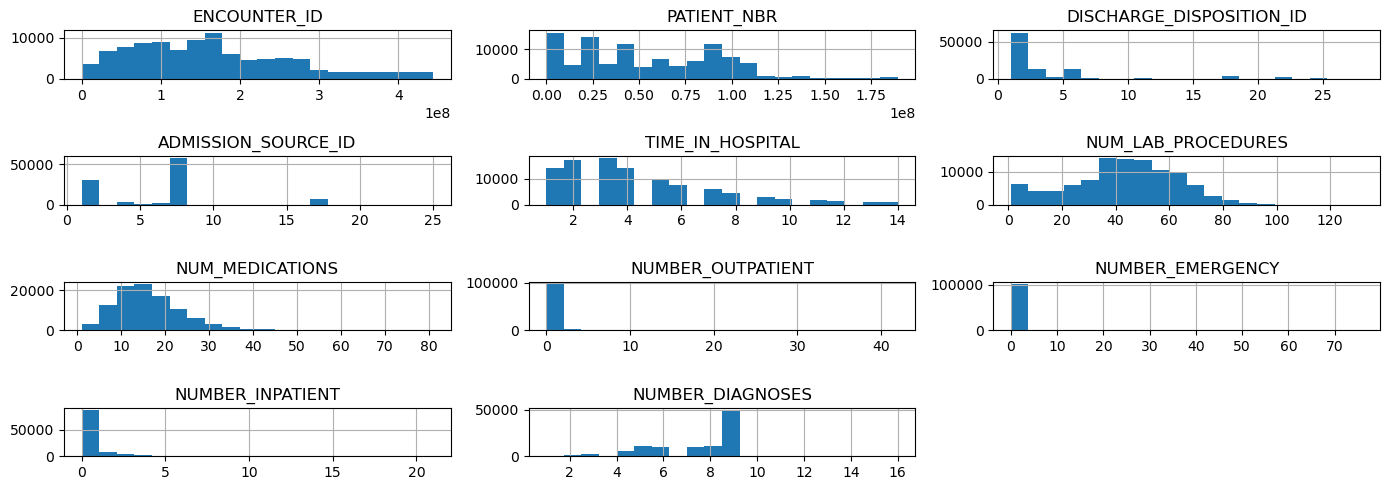

In [47]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        fig, ax = plt.subplots(
            1, 2, figsize=(14, 5)
        )  # 1 row, 2 columns for two subplots
        dataframe[numerical_col].hist(bins=20, ax=ax[0])
        ax[0].set_xlabel(numerical_col)
        ax[0].set_title(numerical_col)

        # Add more plots as needed

        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()


# Assuming df and num_cols are defined somewhere before calling num_summary
num_summary(df, num_cols, plot=True)


/Users/kenzabenkirane/anaconda3/envs/Ana_Py3-12-1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenzabenkirane/anaconda3/envs/Ana_Py3-12-1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenzabenkirane/anaconda3/envs/Ana_Py3-12-1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenzabenkirane/anaconda3/envs/Ana_Py3-12-1/lib/python3.12/site-packages/seaborn/_oldcor

ValueError: num must be an integer with 1 <= num <= 9, not 10

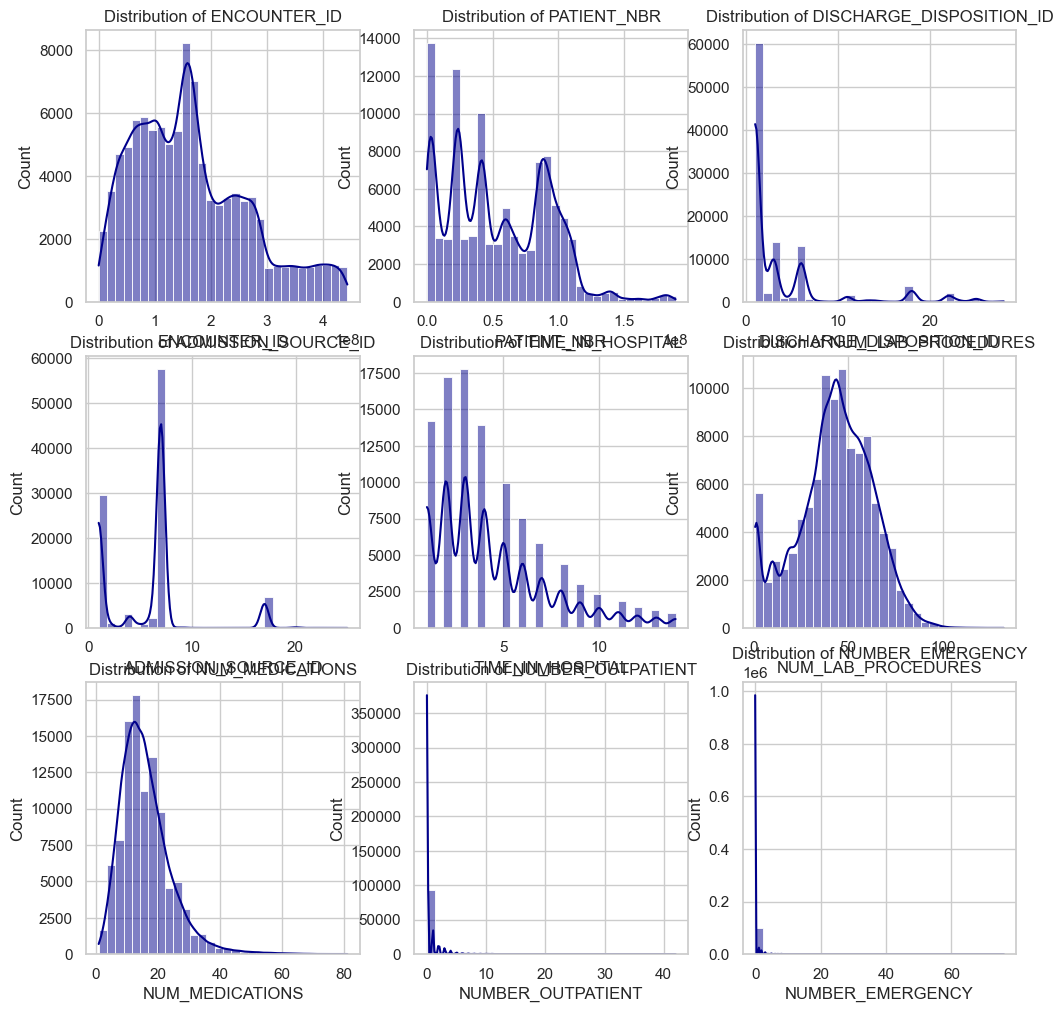

In [52]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df[col], color="darkblue", kde=True, bins=30)
    plt.title(f"Distribution of {col}")

# removing empty subplots
num_columns = len(num_cols)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

fig.suptitle("Numerical Univariate Variable Analysis", fontsize=20, y=1.02)
plt.subplots_adjust(top=1.88)
plt.tight_layout()
plt.show()


/Users/kenzabenkirane/anaconda3/envs/Ana_Py3-12-1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenzabenkirane/anaconda3/envs/Ana_Py3-12-1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenzabenkirane/anaconda3/envs/Ana_Py3-12-1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenzabenkirane/anaconda3/envs/Ana_Py3-12-1/lib/python3.12/site-packages/seaborn/_oldcor

ValueError: num must be an integer with 1 <= num <= 9, not 10

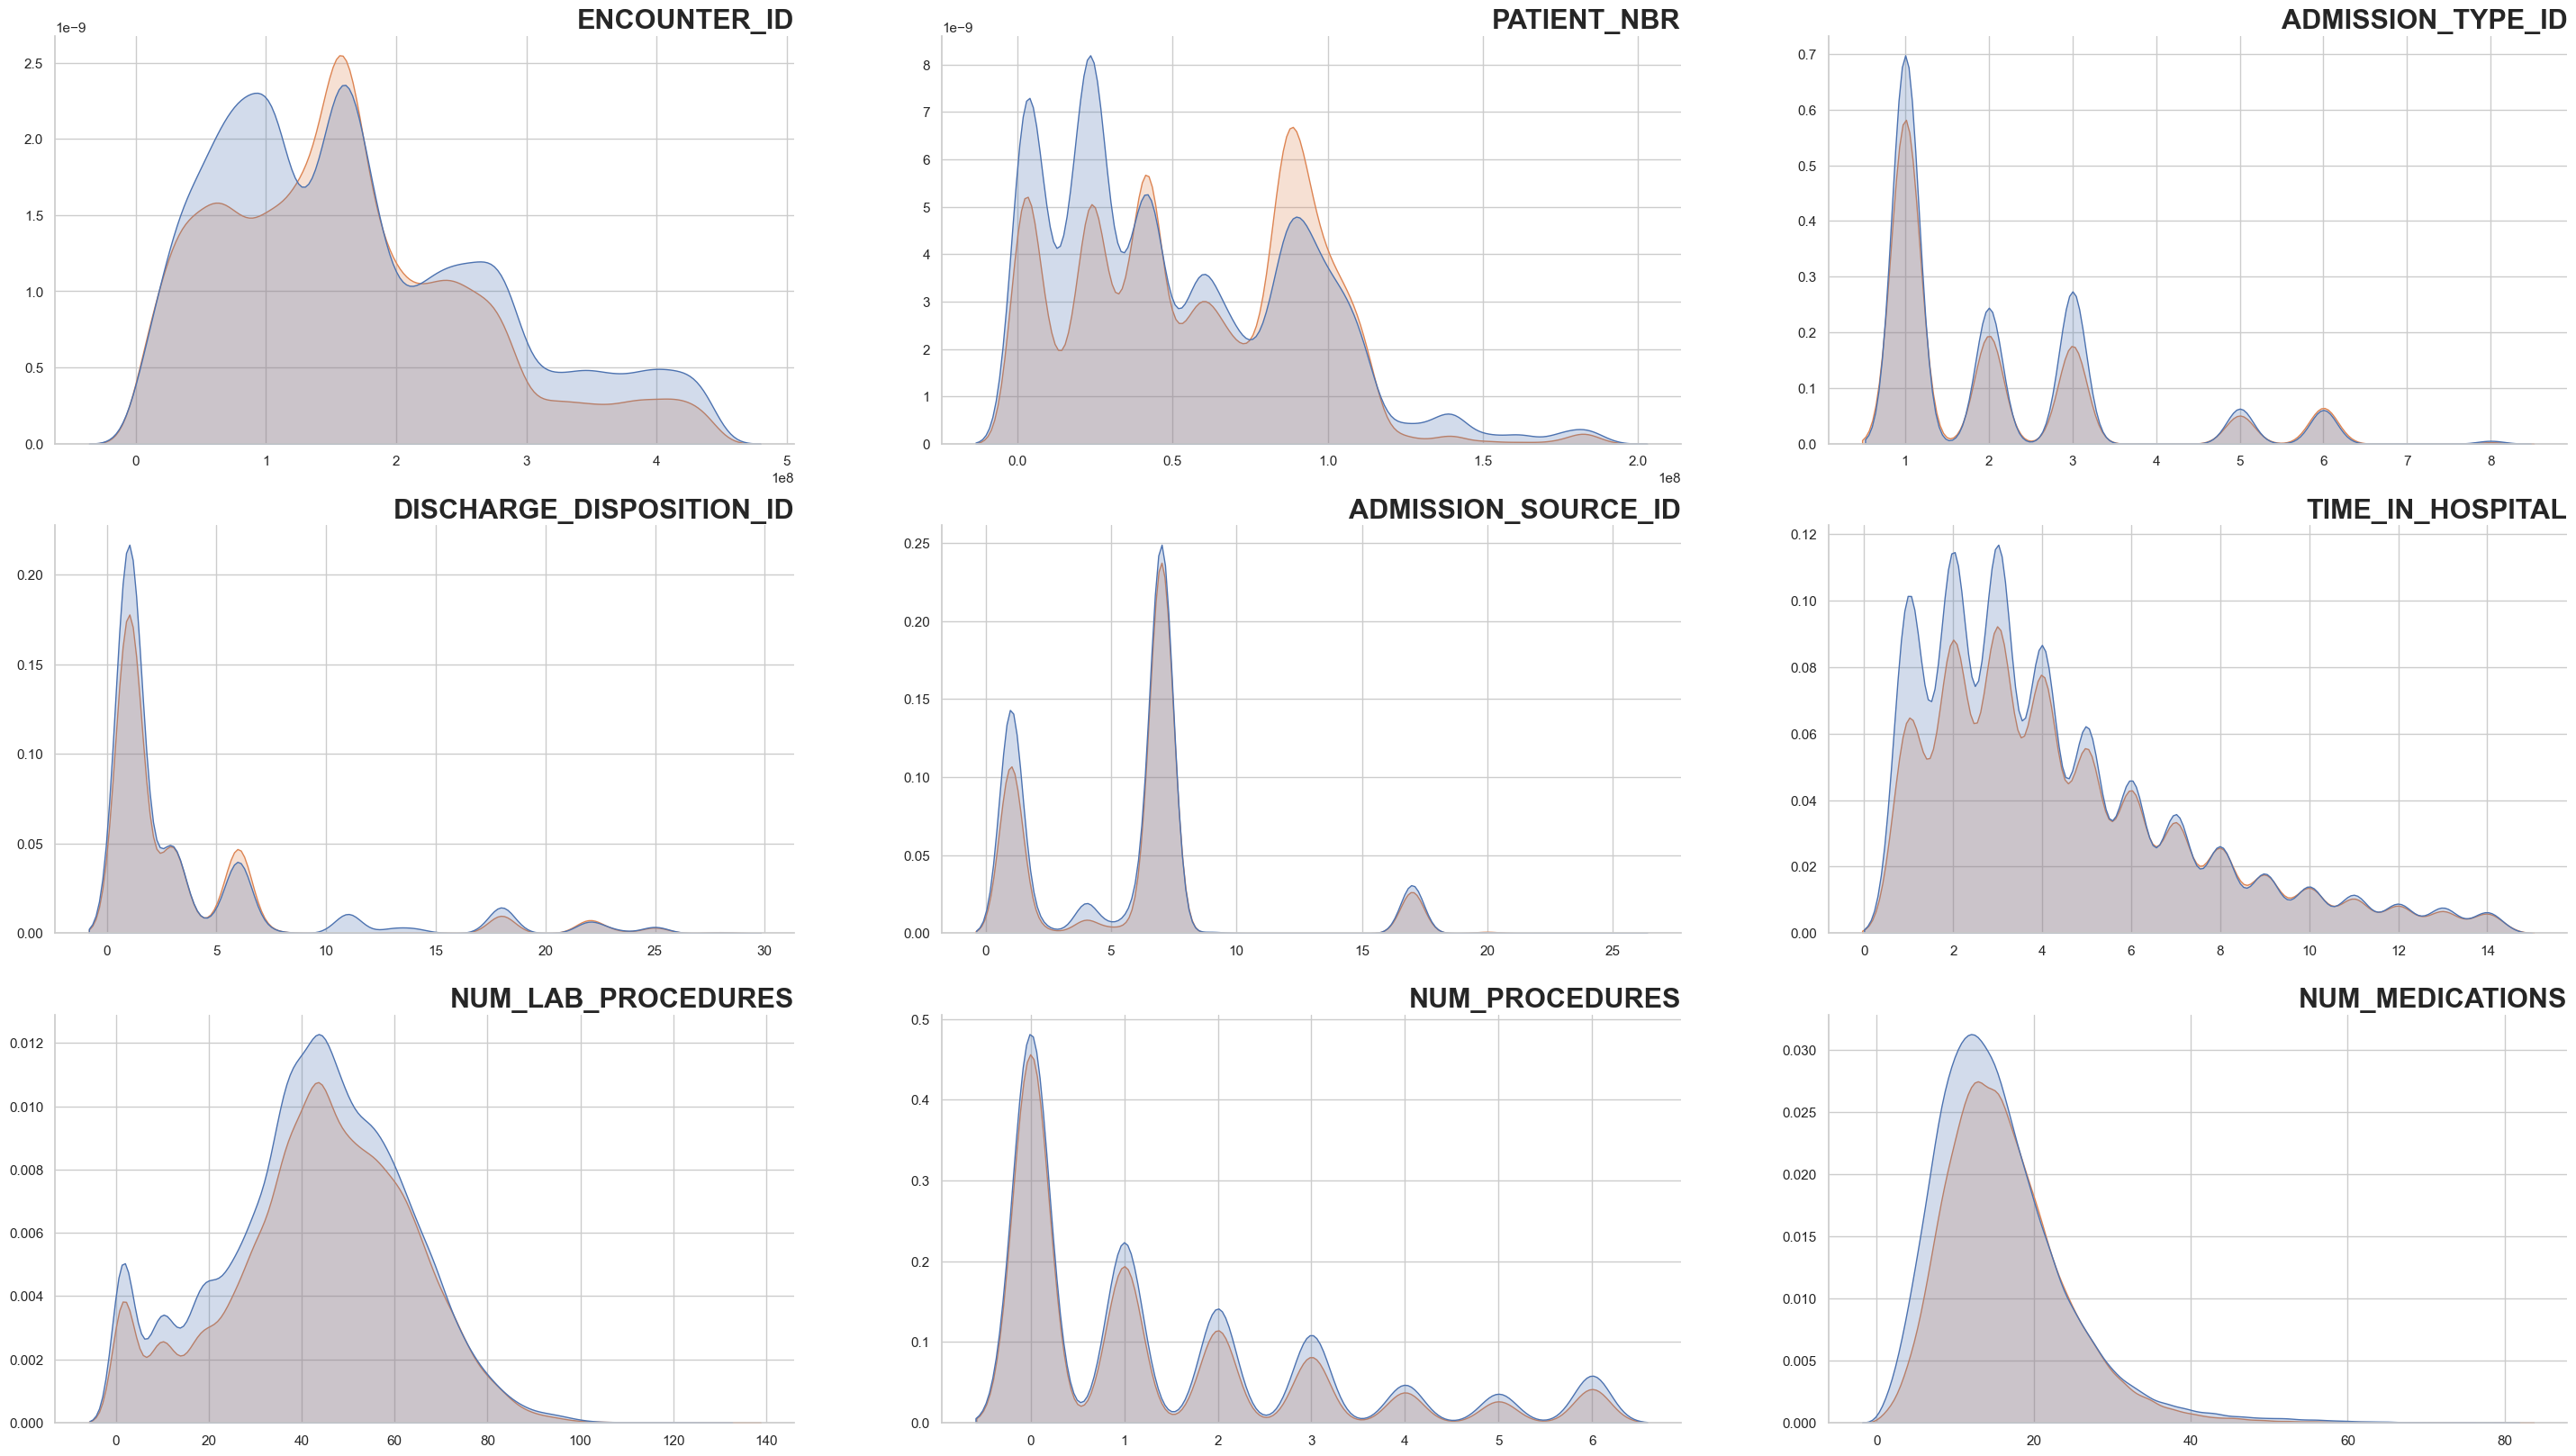

In [57]:
figsize = (6 * 6, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(df3[:-1]):
    ax = plt.subplot(3, 3, idx + 1)
    sns.kdeplot(data=df, hue="READMITTED", fill=True, x=col, legend=False)

    ax.set_ylabel("")
    ax.spines["top"].set_visible(False),
    ax.set_xlabel("")
    ax.spines["right"].set_visible(False)
    ax.set_title(f"{col}", loc="right", weight="bold", fontsize=22)

fig.suptitle(f"Features vs Target\n\n\n", ha="center", fontweight="bold", fontsize=25)
fig.legend(
    ["READMITTED", "NOT READMITTED"],
    loc="upper center",
    bbox_to_anchor=(0.5, 0.96),
    fontsize=21,
    ncol=3,
)
plt.tight_layout()
plt.show()


### 2. Categorical columns


### 3. Categorical numerically-encoded


### 4. Numerical categorically encoded


##  Task 2: Data assembling and initial pre-processing (15%)
